# Momentum and Missed Tackles

## Introduction
- Missed tackles
- Momentum
- Exploration of metrics

## Momentum
- Increased momentum of the ball carrier leads to more missed tackles
    * *histogram or box plot of momentum of ball carrier* (#1)

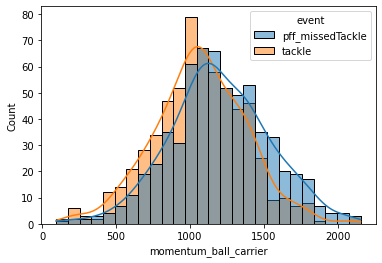

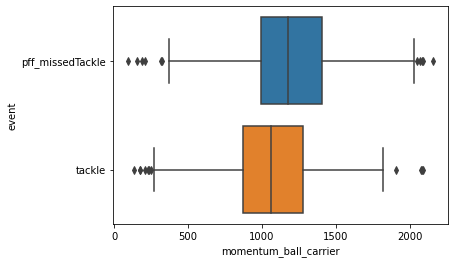

In [21]:
hist(sampled_df, 'momentum_ball_carrier')
box(sampled_df, 'momentum_ball_carrier')

- Increased momentum of the defender leads to more missed tackles
    * *histogram or box plot of momentum of defender* (#2)

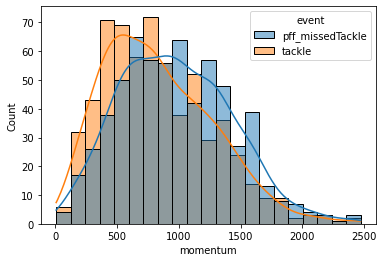

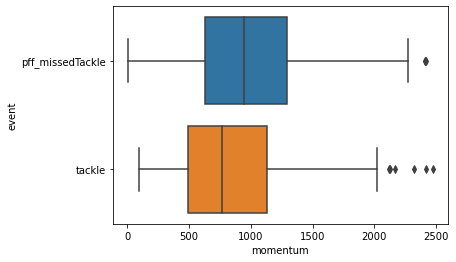

In [23]:
hist(sampled_df, 'momentum')
box(sampled_df, 'momentum')

- momentum of the ball carrier and defender are somewhat positively correlated, slope is similar between tackles and missed tackles, but missed tackles has a higher y intercept (better discussion of how to interpret this)
    * *scatter plot and trend line of momentum vs momentum_ball_carrier* (#3)

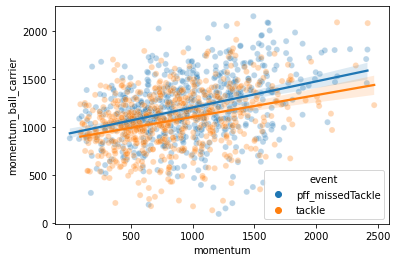

In [24]:
regression(sampled_df, 'momentum')

## Momentum in the plane of the field
- Describe the decomposition of momentum into it's x and y components in terms of the football field
- **Momentum in the x direction**
    * Increased momentum of the ball carrier in the x direction leads to more missed tackles
    * The correlation between the momentum of the ball carrier and the momentum of the defender is dependent on the direction of the momentum. (Explain this better)
        - *scatter plot and trend line of momentum_x vs momentum_x_ball_carrier (decompose into multiple plots)* (#4)
        - Is this the place to explain that most of the defenders have momentum moving in the same x direction as the ball carrier?

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  


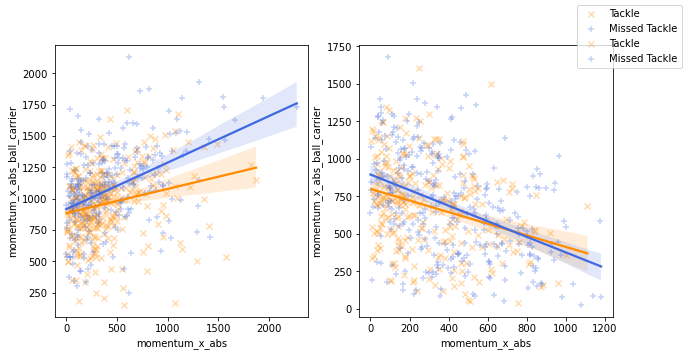

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_1_df = sampled_df[(sampled_df['momentum_x'] > 0) & (sampled_df['momentum_x_ball_carrier'] > 0)]
quad_plot_momentum(plot_1_df, ax[0], 'momentum_x_abs', 'momentum_x_abs_ball_carrier')
plot_2_df = sampled_df[(sampled_df['momentum_x'] < 0) & (sampled_df['momentum_x_ball_carrier'] > 0)]
quad_plot_momentum(plot_2_df, ax[1], 'momentum_x_abs', 'momentum_x_abs_ball_carrier')
fig.legend(loc='best')

- **Momentum in the y direction**
    * Momentum in the y direction is highly positively correlated between the ball carrier and the defender. This is intuitive because the defender will need to move toward the sideline as the ball carrier does.
        - *scatter plot and trend line of momentum_y vs momentum_y_ball_carrier* (#5)
    * Lead into adjusting the plane of momentum from the plane of the field to the plane of the ball carrier.

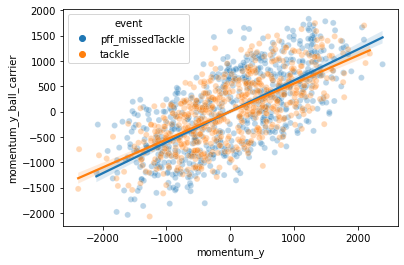

In [26]:
regression(sampled_df, 'momentum_y')

## Momentum in the plane of the ball carrier
- Explain the rotation
    * *breaking this down will need a visual* (#6)

- Momentum perpendicular to the ball carrier indicates more tackles are missed when the momentum of the tackler is directed to the left of the ball carrier
    * *hist or violin of contact_angle_momentum_y* (#7)

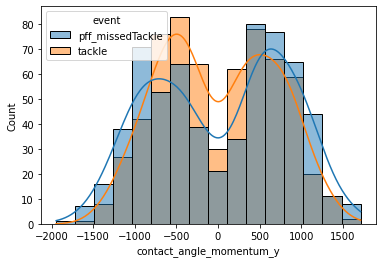

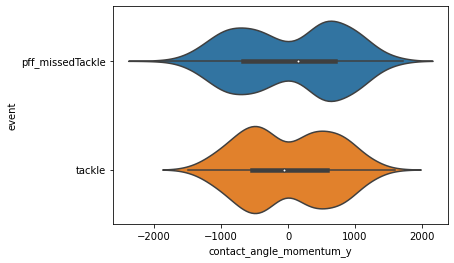

In [27]:
hist(sampled_df, 'contact_angle_momentum_y')
violin(sampled_df, 'contact_angle_momentum_y')

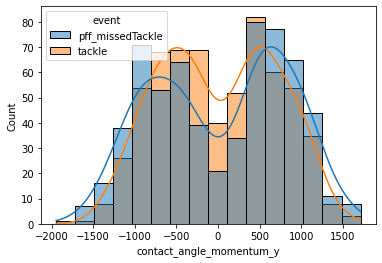

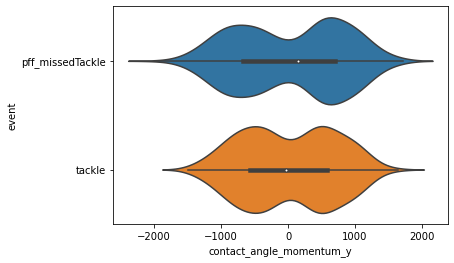

In [139]:
hist(sampled_df_2, 'contact_angle_momentum_y')
violin(sampled_df_2, 'contact_angle_momentum_y')
# the down sampling is showing more tackles in the negative momentum_y
    #this is a product of down sampling
        # probably indicates the more missed tackles in the positive y is a factor
        # of small sample size

    * regression contact_angle_momentum_y vs momentum_y

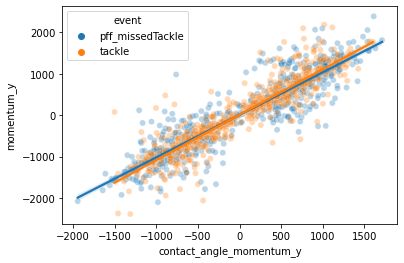

In [51]:
regression_2(sampled_df, 'contact_angle_momentum_y', 'momentum_y')


* *regression contact_angle_momentum vs momentum_ball_carrier* (#8)
    - all the momentum of the ball carrier is moving in the contact_angle direction, this regression is comparable to the momentum vs momentum_ball_carrier and momentum_x vs momentum_x_ball_carrier plots

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  


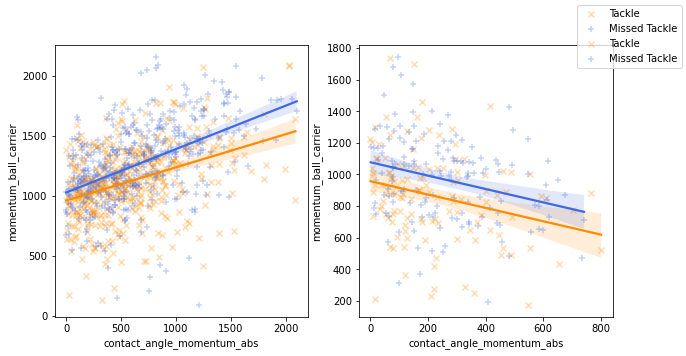

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_1_df = sampled_df[sampled_df['contact_angle_momentum'] > 0]
quad_plot_momentum(plot_1_df, ax[0], 'momentum_ball_carrier', 'contact_angle_momentum_abs')
plot_2_df = sampled_df[(sampled_df['contact_angle_momentum'] < 0) 
                       # one outlier, removed for easier view
                       & (sampled_df['contact_angle_momentum_abs'] < 1000)]
quad_plot_momentum(plot_2_df, ax[1], 'momentum_ball_carrier', 'contact_angle_momentum_abs')
fig.legend(loc='best')

* regression contact_angle_momentum vs contact_angle_momentum_y

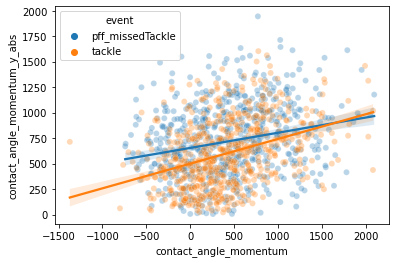

In [53]:
regression_2(sampled_df, 'contact_angle_momentum', 'contact_angle_momentum_y_abs')

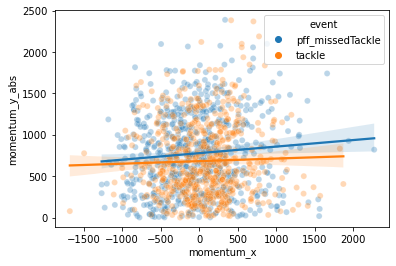

In [145]:
regression_2(sampled_df, 'momentum_x', 'momentum_y_abs')

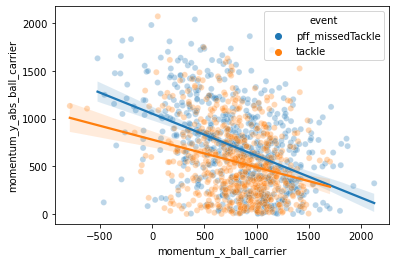

In [144]:
regression_2(sampled_df, 'momentum_x_ball_carrier', 'momentum_y_abs_ball_carrier')

## Conclusion
- Most important take aways
- Future work

# Plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
run_metrics_df = pd.read_csv('../data/processed/run_plays_12-22_about2yards.csv')

In [3]:
# Clean data
def clean_data(metrics_df):
    metrics_df['event'].replace('assist', 'tackle', inplace=True)
    metrics_df.drop(metrics_df[metrics_df['event'] == 'forcedFumble'].index, inplace=True)
    
    metrics_df['tackler_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
    metrics_df['ball_carrier_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
    metrics_df['diff_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
    
    # must be within field of play, and less than 5 seconds from contact point at current speed
    metrics_df['make_contact'] = ((metrics_df['x_contact'] < 110) & 
                                  (metrics_df['x_contact'] > 0) &
                                  (abs(metrics_df['diff_time_to_contact']) < 5)
                                 )
    
    metrics_df['in_field'] = ((metrics_df['x_contact'] < 110) & 
                          (metrics_df['x_contact'] > 0) &
                          (metrics_df['y_contact'] < 53.3) & 
                          (metrics_df['y_contact'] > 0)
                         )
    # reduce data to only contact in field of play
    metrics_df_in_field = metrics_df[metrics_df['in_field'] & (metrics_df['behind_player'] == False)]
    return metrics_df_in_field

In [4]:
run_metrics_df = clean_data(run_metrics_df)

In [5]:
# Define plotting functions
def hist(df, metric):
    sns.histplot(df, x=metric, hue="event", kde=True)
    plt.show()

def violin(df, metric):
    sns.violinplot(df, x=metric, y="event")
    plt.show()

def box(df, metric):
    sns.boxplot(df, x=metric, y="event")
    plt.show()

def regression(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric, y=f"{metric}_ball_carrier", scatter=False)
    plt.show()

def regression_2(df, metric1, metric2):
    ax = sns.scatterplot(df, x=metric1, y=metric2, 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric1, y=metric2, scatter=False)
    plt.show()

In [8]:
run_metrics_df['event'].value_counts()

None                11728
tackle               6105
pff_missedTackle      629
Name: event, dtype: int64

In [12]:
sampled_df = run_metrics_df.groupby('event').apply(lambda x: x.sample(n=629))
sampled_df = sampled_df[sampled_df['event'] != 'None']

In [138]:
sampled_df_2 = run_metrics_df.groupby('event').apply(lambda x: x.sample(n=629))
sampled_df_2 = sampled_df_2[sampled_df_2['event'] != 'None']

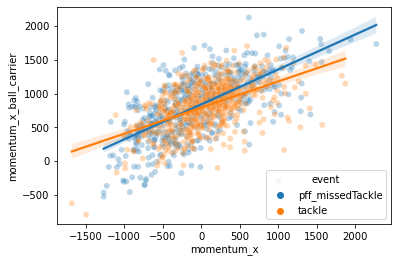

In [54]:
regression(sampled_df, 'momentum_x')

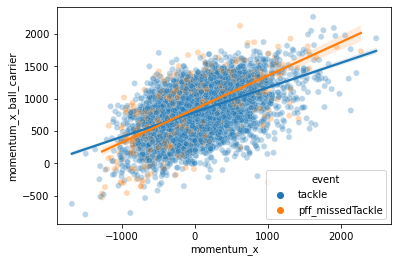

In [66]:
regression(run_metrics_df[run_metrics_df['event'] != 'None'], 'momentum_x')

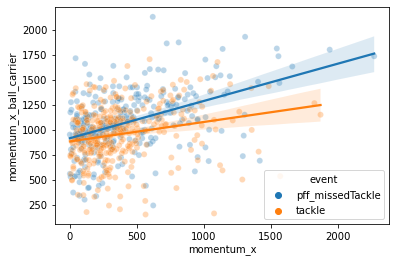

In [63]:
regression(sampled_df[(sampled_df['momentum_x'] > 0) & (sampled_df['momentum_x_ball_carrier'] > 0)], 'momentum_x')

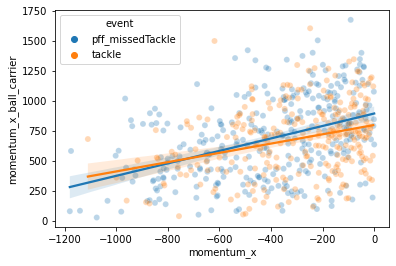

In [64]:
regression(sampled_df[(sampled_df['momentum_x'] < 0) & (sampled_df['momentum_x_ball_carrier'] > 0)], 'momentum_x')

In [117]:
def quad_plot_momentum(plot_df, ax, x_column, y_column):
    colors = ['darkorange', 'royalblue']
    markers = ['x', '+']
    values = ['tackle', 'pff_missedTackle']
    labels = ['Tackle', 'Missed Tackle']

    for i, value in enumerate(values):
        ax = sns.regplot(x=x_column, y=y_column, ax=ax,
                         color=colors[i],
                         marker=markers[i], 
                         data=plot_df[plot_df.event == value],
                         label=labels[i],
                         scatter_kws={'alpha': 0.3})

In [122]:
sampled_df['momentum_x_abs'] = abs(sampled_df['momentum_x'])
sampled_df['momentum_x_abs_ball_carrier'] = abs(sampled_df['momentum_x_ball_carrier'])
sampled_df['contact_angle_momentum_abs'] = abs(sampled_df['contact_angle_momentum'])

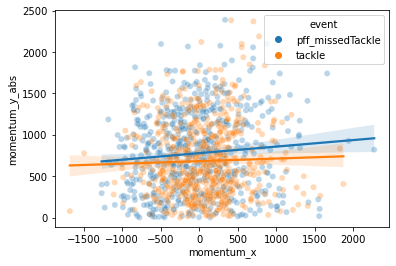

In [142]:
regression_2(sampled_df, 'momentum_x', 'momentum_y_abs')

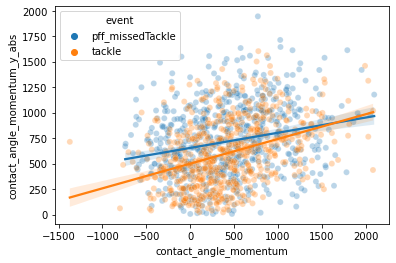

In [141]:
regression_2(sampled_df, 'contact_angle_momentum', 'contact_angle_momentum_y_abs')

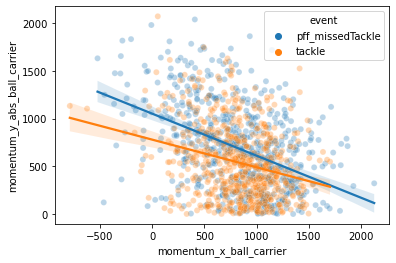

In [143]:
regression_2(sampled_df, 'momentum_x_ball_carrier', 'momentum_y_abs_ball_carrier')